In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=2.0)

In [105]:
gpu_data = pd.read_csv('gpu.csv', index_col=0);gpu_data

,benchmark,env,num_access,time
0,l1v_read,gpu,0,0.000003
1,l1v_read,gpu,128,0.000023
2,l1v_read,gpu,256,0.000044
3,l1v_read,gpu,384,0.000064
4,l1v_read,gpu,512,0.000087
5,l1v_read,gpu,640,0.000104
6,l1v_read,gpu,768,0.000125
7,l1v_read,gpu,896,0.000144
8,l1v_read,gpu,1024,0.000171
9,l1v_read,gpu,1152,0.000186


(0, 0.001)

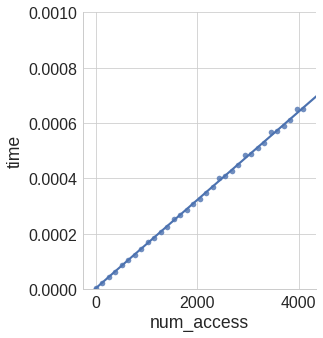

In [106]:
lm = sns.lmplot('num_access', 'time', gpu_data)
lm.axes[0, 0].set_ylim(0, 1e-3)

(2e-06, 3e-05)

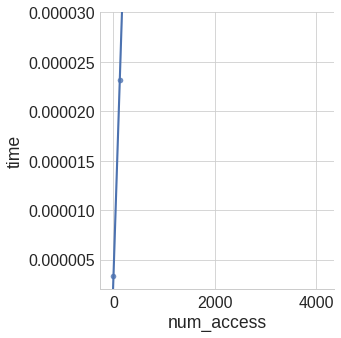

In [107]:
filtered_gpu_data = gpu_data[(gpu_data['time']<0.000015) | (gpu_data['time']>0.000018)]
lm2 = sns.lmplot('num_access', 'time', filtered_gpu_data)
lm2.axes[0, 0].set_ylim(2e-6, 3e-5)

In [108]:
result = sm.ols(formula="time ~ num_access", data=gpu_data).fit()
result.params

Intercept     2.878346e-06
num_access    1.594817e-07
dtype: float64

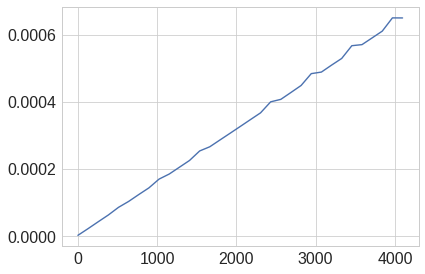

In [109]:
agg_data = filtered_gpu_data.groupby(['benchmark', 'env', 'num_access']).agg(np.mean).reset_index(); agg_data
plt.plot(agg_data['num_access'], agg_data['time'])

### Conclusion
Each l1 hit takes 150 cycle?

In [110]:
sim_data = pd.read_csv('sim.csv', index_col=0)

In [111]:
full_data = gpu_data.append(sim_data, ignore_index=True)

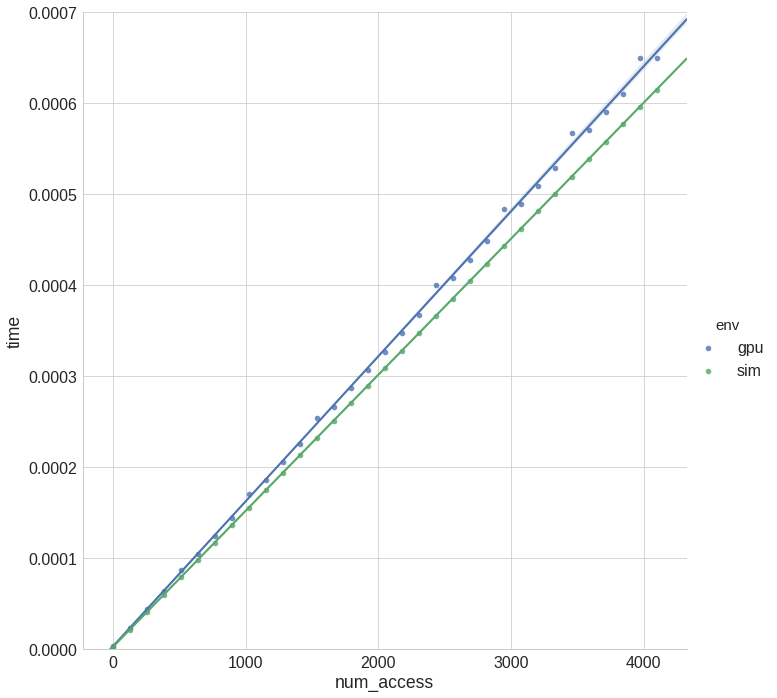

In [112]:
lm3 = sns.lmplot('num_access', 'time', full_data, hue='env', size=10)
lm3.axes[0, 0].set_ylim(0, 7e-4)
plt.savefig('l1_read.pdf')

### Conclusion

Simulation result has a good starting point estimation. But L1 hit is seriously under-estimated. Or the L1 is not really used in this case?